<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Regress%C3%A3o_Linear_Simples_exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O Ministério da Educação solicitou a você uma previsão do percentual de alunos que serão aprovados no ano de 2017, tendo como base o ano de 2016.
Crie um modelo que consiga prever o valor de aprovação em 2016 com as aprovações de 2015.
Faça todo tratamento de dados aprendido e faça a regressão linear e tire o resíduo para saber em quanto o modelo está errando.

In [16]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [7]:
df = pd.read_excel('aprovacaodealunos.xlsx')
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


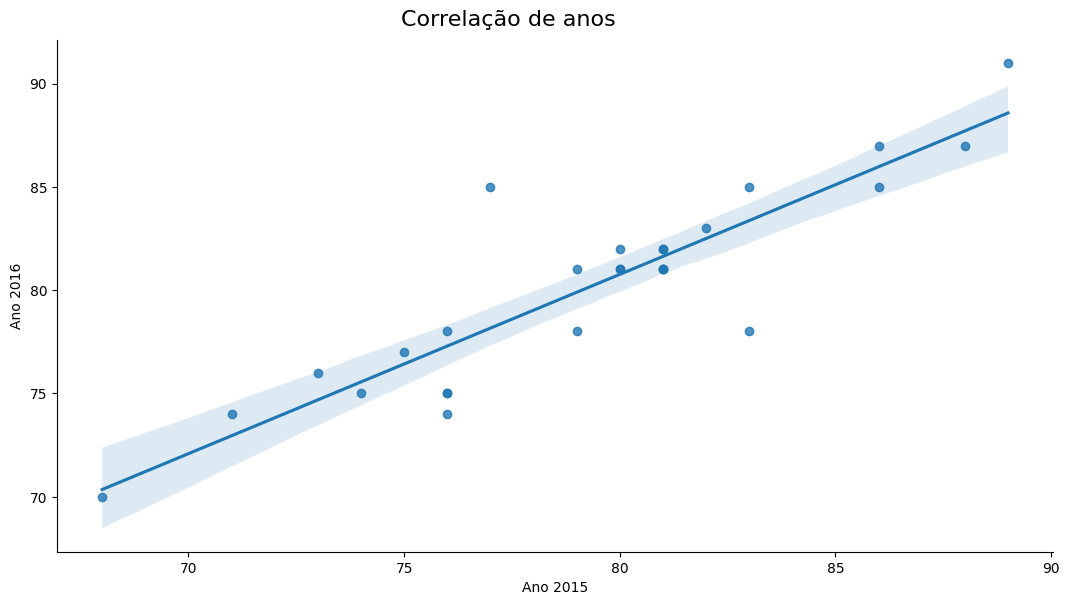

In [11]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=df)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Correlação de anos", fontsize=16, y=1.02)
ax.set(xlabel="Ano 2015", ylabel="Ano 2016")
ax;

In [15]:
df_anos = df[['ano_2015', 'ano_2016']]
df_anos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [24]:
Y = df['ano_2016']
X = sm.add_constant(df['ano_2015'])
df_regressao = sm.OLS(Y, X).fit()
print(df_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           3.02e-10
Time:                        20:58:23   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [26]:
df['previsao'] = df_regressao.predict(X)
df.head()

,UF,ano_2015,ano_2016,previsao
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [27]:
df['residuo'] = df['previsao'] - df['ano_2016']
df.head()

,UF,ano_2015,ano_2016,previsao,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
